In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import code
from truss import Node, Bar, Truss

In [3]:
# define nodes
n0 = Node(0,0, freex=False,freey=False)
n1 = Node(1,0, freey=False)
n2 = Node(0,1)
n3 = Node(1,1)

# apply loads
n3.apply_load(10**3, 0)

In [4]:
# create bars
b0 = Bar(n0,n1)
b1 = Bar(n0,n2)
b2 = Bar(n0,n3)
b3 = Bar(n1,n2)
b4 = Bar(n1,n3)
b5 = Bar(n2,n3)
bars = [b0, b1, b2, b3, b4, b5]

In [5]:
# a bar defined the opposite way is identified as the same bar:
b0p = Bar(n1, n0)
b0p == b0

True

In [6]:
#but the 'is' command doesnt work
b0p is b0

False

In [7]:
# using the set command automatically removes the same bars
print([b0p, b0, b1])
print(set([b0p, b0, b1]))

[B(N(1.00, 0.00), N(0.00, 0.00)), B(N(0.00, 0.00), N(1.00, 0.00)), B(N(0.00, 0.00), N(0.00, 1.00))]
{B(N(0.00, 0.00), N(0.00, 1.00)), B(N(1.00, 0.00), N(0.00, 0.00))}


In [8]:
# modifying a node after the truss is created is also works!
n1.y = 0.5

In [9]:
# create the truss, by passing it a set of bars
truss = Truss(bars)

# solve it
truss.solve(method="solve")

In [10]:
with np.printoptions(precision=3, suppress=True):
    print('Vector of node deflections:')
    print(truss.u)
    print()
    print('Vector of applied forces: ')
    print(truss.F)
    print()
with np.printoptions(precision=1, suppress=True):
    print('Stiffness Matrix: ')
    print(str(truss.stiffness/10**6) + ' * 10^6')


Vector of node deflections:
[ 0.001  0.     0.     0.001 -0.   ]

Vector of applied forces: 
[   0.    0.    0. 1000.    0.]

Stiffness Matrix: 
[[ 3.9 -0.8 -1.6 -2.3  0. ]
 [-0.8  2.7  0.8  0.   0. ]
 [-1.6  0.8  3.2 -0.  -0. ]
 [-2.3  0.  -0.   3.1  0.8]
 [ 0.   0.  -0.   0.8  5.3]] * 10^6


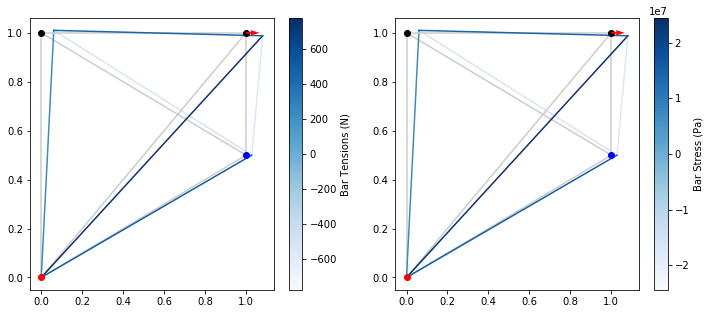

In [11]:
truss.plot(def_scale=100)
# deformation scale=1 implies the plotted deformation is exact. 
# passing a value will scale the deformations appropriately

In [12]:
# get a panda with all the details of the truss
df_n, df_b = truss.details()

In [13]:
# for the nodes
df_n

,ID,x (m),y (m),Free x?,Free y?,Force x (N),Force y (N),Delta x (mm),Delta y (mm)
0,0,0,1.0,True,True,0,0,0.609764,0.100123
1,1,1,0.5,True,False,0,0,0.279851,0.000000
2,2,0,0.0,False,False,0,0,0.000000,0.000000
3,3,1,1.0,True,True,1000,0,0.810010,-0.121681


In [14]:
# for the bars
df_b

,ID,Node 0,Node 1,E (GPa),Yield (MPa),w (mm),t (mm),A (mm2),I (mm4),L (m),m (kg),Buckling Load (N),T (N),ext (mm),Stress (MPa),Strain,Will buckle?,Will yield?,Buckle Margin,Yield Margin
0,0,"N(1.00, 0.50)","N(0.00, 1.00)",71.0,300.0,5.0,6.35,31.75,66.145833,1.118034,0.095843,37.080926,-504.684146,-0.250307,-15.895564,-0.000224,True,False,0.073474,-18.873190
1,1,"N(0.00, 0.00)","N(0.00, 1.00)",71.0,300.0,5.0,6.35,31.75,66.145833,1.000000,0.085725,46.351158,225.701611,0.100123,7.108712,0.000100,False,False,0.000000,42.201737
2,2,"N(1.00, 0.50)","N(1.00, 1.00)",71.0,300.0,5.0,6.35,31.75,66.145833,0.500000,0.042862,185.404631,-548.596777,-0.121681,-17.278639,-0.000243,True,False,0.337962,-17.362479
3,3,"N(0.00, 0.00)","N(1.00, 1.00)",71.0,300.0,5.0,6.35,31.75,66.145833,1.414214,0.121233,23.175579,775.833002,0.486722,24.435685,0.000344,False,False,0.000000,12.277127
4,4,"N(0.00, 0.00)","N(1.00, 0.50)",71.0,300.0,5.0,6.35,31.75,66.145833,1.118034,0.095843,37.080926,504.684146,0.250307,15.895564,0.000224,False,False,0.000000,18.873190
5,5,"N(0.00, 1.00)","N(1.00, 1.00)",71.0,300.0,5.0,6.35,31.75,66.145833,1.000000,0.085725,46.351158,451.403223,0.200245,14.217424,0.000200,False,False,0.000000,21.100868


In [15]:
# get the truss mass
truss.mass()

0.527232885005603

## Generating Random Trusses

In [16]:
# define a few fixed nodes
n00 = Node(0,0.5,freex=False, freey=False)
n01 = Node(1,0.5, freey=False)
n11 = Node(0.5,0.5)
n11.apply_load(0, -10**2)

# define a list of random nodes
nodes = [Node(np.random.rand(),np.random.rand()) for n in range(100)]
nodes = [n00, n01, n11] + nodes

In [17]:
# creates a random truss using the nodes
# uses Delaunay triangulation to find the appropriate set of bars
randTruss = Truss.from_delaunay(nodes)

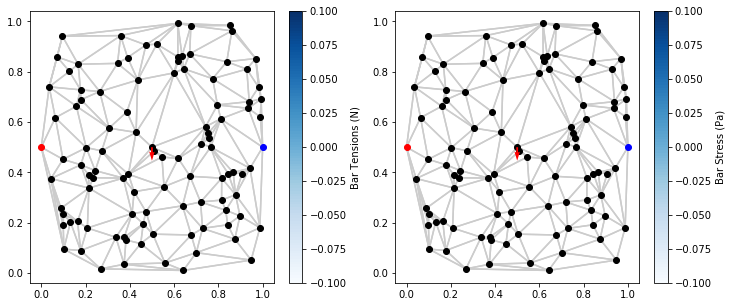

In [18]:
randTruss.plot()

In [19]:
randTruss.solve()

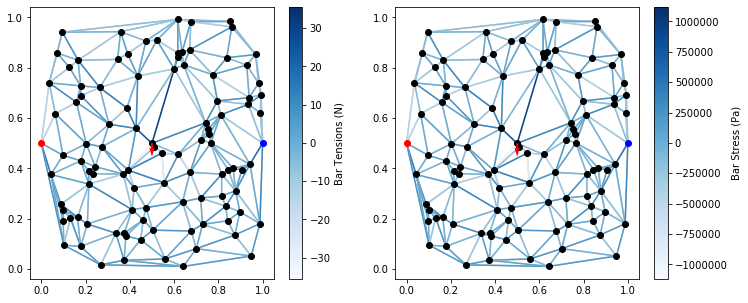

In [20]:
randTruss.plot(def_scale=100)

In [21]:
df_n, df_b = randTruss.details()

In [22]:
randTruss.mass()

3.0000086569251185

# Vertify against existing solution

using Q1 from http://www.stad4students.co.uk/_pages/pg_STADs_tPJFS.php

<img src="pinJoint_verify.png">

Solution:

FAB = -268.9e3

FAD = + 49.9e3

FBD = +192.1e3

FBC = - 85.6e3

FCD = -188.7e3

In [23]:
x1=7.34
y1=38.91
P1=75.5e3
P2=85.4e3

nA = Node(0,0,freey=False)
nB = Node(x1,y1)
nC = Node(x1+x1,y1,freex=False,freey=False)
nD = Node(x1+x1,0)

nD.apply_load(P2,0)
nB.apply_load(0,-P1)

In [24]:
bAD = Bar(nA, nD)
bAB = Bar(nA, nB)
bBD = Bar(nB, nD)
bBC = Bar(nB, nC)
bCD = Bar(nC, nD)
bars = [bAD, bAB, bBD, bBC, bCD]

In [25]:
exampleTruss = Truss(bars)

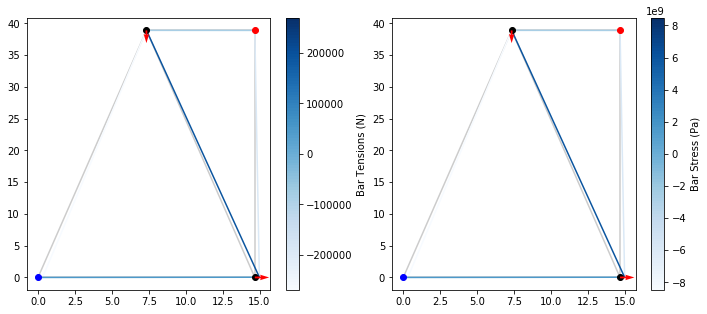

In [26]:
exampleTruss.solve()
exampleTruss.plot(def_scale=1e-2)

In [27]:
df_n, df_b = exampleTruss.details()

In [28]:
df_n

,ID,x (m),y (m),Free x?,Free y?,Force x (N),Force y (N),Delta x (mm),Delta y (mm)
0,0,7.34,38.91,True,True,0.0,-75500.0,278.068537,910.460995
1,1,0.00,0.00,True,False,0.0,0.0,30571.765399,0.000000
2,2,14.68,0.00,True,True,85400.0,0.0,30896.208064,3255.486504
3,3,14.68,38.91,False,False,0.0,0.0,0.000000,0.000000


In [29]:
df_b

,ID,Node 0,Node 1,E (GPa),Yield (MPa),w (mm),t (mm),A (mm2),I (mm4),L (m),m (kg),Buckling Load (N),T (N),ext (mm),Stress (MPa),Strain,Will buckle?,Will yield?,Buckle Margin,Yield Margin
0,0,"N(14.68, 38.91)","N(14.68, 0.00)",71.0,300.0,5.0,6.35,31.75,66.145833,38.910000,3.335560,0.030615,-188606.539510,-3255.486504,-5940.363449,-0.083667,True,False,1.623235e-07,-0.050502
1,1,"N(0.00, 0.00)","N(7.34, 38.91)",71.0,300.0,5.0,6.35,31.75,66.145833,39.596259,3.394389,0.029563,-268764.606853,-4720.892932,-8465.026987,-0.119226,True,False,1.099968e-07,-0.035440
2,2,"N(0.00, 0.00)","N(14.68, 0.00)",71.0,300.0,5.0,6.35,31.75,66.145833,14.680000,1.258443,0.215084,49821.177075,324.442666,1569.170932,0.022101,False,True,0.000000e+00,0.191184
3,3,"N(7.34, 38.91)","N(14.68, 38.91)",71.0,300.0,5.0,6.35,31.75,66.145833,7.340000,0.629221,0.860337,-85400.000000,-278.068537,-2689.763780,-0.037884,True,False,1.007420e-05,-0.111534
4,4,"N(7.34, 38.91)","N(14.68, 0.00)",71.0,300.0,5.0,6.35,31.75,66.145833,39.596259,3.394389,0.029563,191933.007548,3371.333709,6045.134096,0.085143,False,True,0.000000e+00,0.049627


In [30]:
bAD.tension()

49821.17707530178

In [31]:

print(f"AB: True = -268.9e3 N, Solve = {bAB.tension():.3e} N")
print(f"AD: True = + 49.9e3 N, Solve = {bAD.tension():.3e} N")
print(f"BD: True = +192.1e3 N, Solve = {bBD.tension():.3e} N")
print(f"BC: True = - 85.6e3 N, Solve = {bBC.tension():.3e} N")
print(f"CD: True = -188.7e3 N, Solve = {bCD.tension():.3e} N")

AB: True = -268.9e3 N, Solve = -2.688e+05 N
AD: True = + 49.9e3 N, Solve = 4.982e+04 N
BD: True = +192.1e3 N, Solve = 1.919e+05 N
BC: True = - 85.6e3 N, Solve = -8.540e+04 N
CD: True = -188.7e3 N, Solve = -1.886e+05 N


VERIFIED! The small differences are likely to be due to rounding errors in the 'true' solution

# Lets check the deflections

using: https://civilengineer.webinfolist.com/str/prob75.htm

<img src="pinJoin_verify_2.png">

Solution: E moves by 2.6 mm downwards

In [32]:
l = 2
nA = Node(0,0, freey=False)
nB = Node(l, 0)
nC = Node(2*l,0, freex=False, freey=False)
nD = Node(2*l, l)
nE = Node(l, l)
nF = Node(0, l)

nB.apply_load(0, -20e3)
nD.apply_load(-15e3, 0)
nE.apply_load(0, -10e3)
nF.apply_load(0, -25e3)

In [33]:
#each of the bars have an area of 250 mm^2 , and E = 200 GPa
# so w = t = np.sqrt(250)*1e-3
w0 = np.sqrt(250)*1e-3
E = 200e9;
bAB = Bar(nA, nB, w=w0, t=w0, E=E) # you can specify widths, thickness and youngs modulus etc during bar creation
bBC = Bar(nB, nC, w=w0, t=w0, E=E)
bCD = Bar(nC, nD, w=w0, t=w0, E=E)
bDE = Bar(nD, nE, w=w0, t=w0, E=E)
bEF = Bar(nE, nF, w=w0, t=w0, E=E)
bAF = Bar(nA, nF, w=w0, t=w0, E=E)
bAE = Bar(nA, nE, w=w0, t=w0, E=E)
bBE = Bar(nB, nE, w=w0, t=w0, E=E)
bCE = Bar(nC, nE, w=w0, t=w0, E=E)
bars = [bAB, bBC, bCD, bDE, bEF, bAF, bAE, bBE, bCE]

In [34]:
w0

0.015811388300841896

In [35]:
example2Truss = Truss(bars)

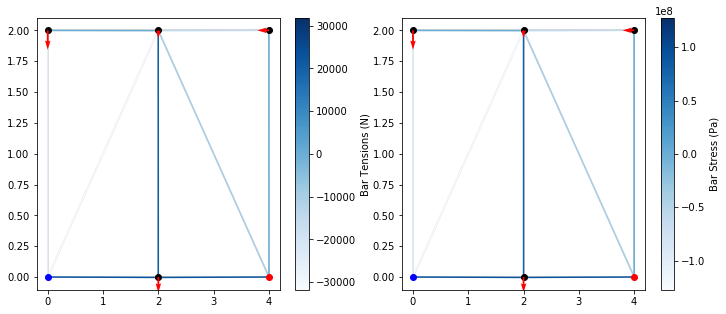

In [36]:
example2Truss.solve()
example2Truss.plot()

In [37]:
example2Truss.details()

(   ID  x (m)  y (m)  Free x?  Free y?  Force x (N)  Force y (N)  Delta x (mm)  \
 0   0      0      0     True    False          0.0          0.0     -1.800000   
 1   1      2      0     True     True          0.0     -20000.0     -0.900000   
 2   2      2      2     True     True          0.0     -10000.0     -1.748528   
 3   3      4      2     True     True     -15000.0          0.0     -2.348528   
 4   4      0      2     True     True          0.0     -25000.0     -1.748528   
 5   5      4      0    False    False          0.0          0.0      0.000000   
 
    Delta y (mm)  
 0  0.000000e+00  
 1 -3.397056e+00  
 2 -2.597056e+00  
 3  7.032707e-17  
 4 -1.000000e+00  
 5  0.000000e+00  ,
    ID         Node 0         Node 1  E (GPa)  Yield (MPa)     w (mm)  \
 0   0  N(4.00, 0.00)  N(2.00, 2.00)    200.0        300.0  15.811388   
 1   1  N(0.00, 0.00)  N(2.00, 2.00)    200.0        300.0  15.811388   
 2   2  N(2.00, 0.00)  N(4.00, 0.00)    200.0        300.0  15.811388  

In [38]:
print(f'Node E deflection: True: 2.6 mm downwards, Solve: {nE.dy*10**3} mm')

Node E deflection: True: 2.6 mm downwards, Solve: -2.597056274847714 mm


Verified!

## Now try to minimize the mass of the structure
we wont impose any deflection constrains on this example

In [39]:
# start by setting a large bar width
example2Truss.set_all_widths(0.6) #60 cm width
example2Truss.solve()

In [40]:
example2Truss.mass() # in kg

503.49949160508066

In [41]:
example2Truss.details()

(   ID  x (m)  y (m)  Free x?  Free y?  Force x (N)  Force y (N)  Delta x (mm)  \
 0   0      0      0     True    False          0.0          0.0     -0.047434   
 1   1      2      0     True     True          0.0     -20000.0     -0.023717   
 2   2      2      2     True     True          0.0     -10000.0     -0.046078   
 3   3      4      2     True     True     -15000.0          0.0     -0.061889   
 4   4      0      2     True     True          0.0     -25000.0     -0.046078   
 5   5      4      0    False    False          0.0          0.0      0.000000   
 
    Delta y (mm)  
 0  0.000000e+00  
 1 -8.952029e-02  
 2 -6.843844e-02  
 3  1.853281e-18  
 4 -2.635231e-02  
 5  0.000000e+00  ,
    ID         Node 0         Node 1  E (GPa)  Yield (MPa)  w (mm)     t (mm)  \
 0   0  N(4.00, 0.00)  N(2.00, 2.00)    200.0        300.0   600.0  15.811388   
 1   1  N(0.00, 0.00)  N(2.00, 2.00)    200.0        300.0   600.0  15.811388   
 2   2  N(2.00, 0.00)  N(4.00, 0.00)    200.0  

In [42]:
sol=example2Truss.minimize_mass(buckling_SF=1.1, yield_SF=1.1, minW=3.5e-3, maxW=1)

/Users/Devansh/Documents/GitHub/pyTruss/truss.py:599: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  sol = np.linalg.lstsq(stiffness, F)


In [43]:
sol

     fun: 94.32849612535458
     jac: array([120.74767113, 120.74767113,  85.38149643,  85.38149643,
        85.38149643,  85.38149643,  85.38149643,  85.38149643,
        85.38149643])
 message: 'Optimization terminated successfully.'
    nfev: 143
     nit: 14
    njev: 10
  status: 0
 success: True
       x: array([0.14354908, 0.43064725, 0.00521776, 0.0035    , 0.0035    ,
       0.00521776, 0.00463801, 0.16917422, 0.10150453])

In [44]:
example2Truss.set_widths(sol.x)
example2Truss.solve()

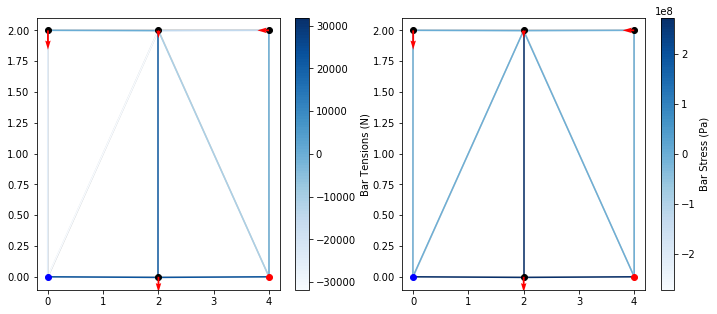

In [45]:
example2Truss.plot()

/Users/Devansh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


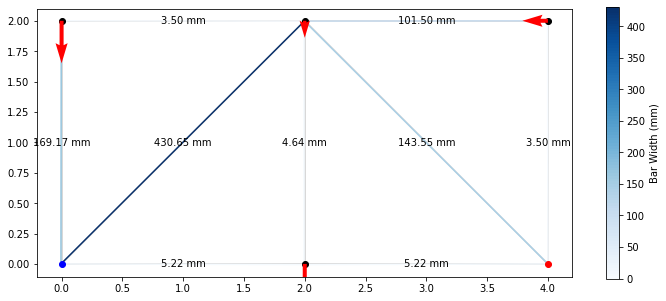

In [46]:
plt.figure(figsize=(12,5))
example2Truss.plot_widths(label=True)
plt.axes().set_aspect('equal')
# note that the plot line widths dont represent the bar widths to scale

In [47]:
example2Truss.mass()

94.32849612535458

In [48]:
df_n, df_b = example2Truss.details()

In [49]:
df_n

,ID,x (m),y (m),Free x?,Free y?,Force x (N),Force y (N),Delta x (mm),Delta y (mm)
0,0,0,0,True,False,0.0,0.0,-5.454547,0.000000e+00
1,1,2,0,True,True,0.0,-20000.0,-2.727274,-5.548009e+00
2,2,2,2,True,True,0.0,-10000.0,-2.727274,-2.820736e+00
3,3,4,2,True,True,-15000.0,0.0,-2.820736,-1.592232e-16
4,4,0,2,True,True,0.0,-25000.0,-2.727274,-9.346216e-02
5,5,4,0,False,False,0.0,0.0,0.000000,0.000000e+00


In [50]:
df_b

,ID,Node 0,Node 1,E (GPa),Yield (MPa),w (mm),t (mm),A (mm2),I (mm4),L (m),m (kg),Buckling Load (N),T (N),ext (mm),Stress (MPa),Strain,Will buckle?,Will yield?,Buckle Margin,Yield Margin
0,0,"N(4.00, 0.00)","N(2.00, 2.00)",200.0,300.0,143.549082,15.811388,2269.710273,47285.630682,2.828427,17.333217,11667.261717,-1.060660e+04,-6.608773e-02,-4.673108e+00,-2.336554e-05,False,False,1.100000e+00,-6.419710e+01
1,1,"N(0.00, 0.00)","N(2.00, 2.00)",200.0,300.0,430.647250,15.811388,6809.130885,141856.893444,2.828427,51.999652,35001.785497,-3.181981e+04,-6.608773e-02,-4.673108e+00,-2.336554e-05,False,False,1.100000e+00,-6.419710e+01
2,2,"N(2.00, 0.00)","N(4.00, 0.00)",200.0,300.0,5.217757,15.811388,82.499975,187.171703,2.000000,0.445500,92.365533,2.250000e+04,2.727274e+00,2.727274e+02,1.363637e-03,False,False,0.000000e+00,1.100000e+00
3,3,"N(2.00, 2.00)","N(0.00, 2.00)",200.0,300.0,3.500000,15.811388,55.339859,56.492773,2.000000,0.298835,27.878066,-5.516619e-13,-9.968619e-17,-9.968619e-15,-4.984309e-20,False,False,5.053469e+13,-3.009444e+16
4,4,"N(4.00, 0.00)","N(4.00, 2.00)",200.0,300.0,3.500000,15.811388,55.339859,56.492773,2.000000,0.298835,27.878066,-1.836970e-12,-3.319434e-16,-3.319434e-14,-1.659717e-19,False,False,1.517611e+13,-9.037685e+15
5,5,"N(0.00, 0.00)","N(2.00, 0.00)",200.0,300.0,5.217757,15.811388,82.499975,187.171703,2.000000,0.445500,92.365533,2.250000e+04,2.727274e+00,2.727274e+02,1.363637e-03,False,False,0.000000e+00,1.100000e+00
6,6,"N(2.00, 0.00)","N(2.00, 2.00)",200.0,300.0,4.638006,15.811388,73.333310,131.456663,2.000000,0.396000,64.871263,2.000000e+04,2.727274e+00,2.727274e+02,1.363637e-03,False,False,0.000000e+00,1.100000e+00
7,7,"N(0.00, 0.00)","N(0.00, 2.00)",200.0,300.0,169.174216,15.811388,2674.879224,55726.650509,2.000000,14.444348,27499.999756,-2.500000e+04,-9.346216e-02,-9.346216e+00,-4.673108e-05,False,False,1.100000e+00,-3.209855e+01
8,8,"N(4.00, 2.00)","N(2.00, 2.00)",200.0,300.0,101.504529,15.811388,1604.927525,33435.990107,2.000000,8.666609,16499.999756,-1.500000e+04,-9.346216e-02,-9.346216e+00,-4.673108e-05,False,False,1.100000e+00,-3.209855e+01
